In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/jannajulianfeiten/Downloads/amz_uk_price_prediction_dataset.csv")


In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
df.isnull().sum().sort_values(ascending=False)

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [5]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
# Remember to adjust the threshold (in this case, < 20) based on your dataset's specific characteristics and domain knowledge.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]

In [6]:
# Extracting columns with object (typically string) data types to create a categorical dataframe
# For demonstration purposes, let's consider the columns in potential_categorical_from_numerical as categorical variables.
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

# Adjusting the numerical dataframe by removing the moved columns
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [7]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True).head(5)

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Motorbike Chassis                            107
 Alexa Built-In Devices                       107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

In [8]:
# Creating a crosstab table for the 'category' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_categorical["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [9]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
ax=sns.barplot(y=frequency_table.index, x=frequency_table.values, palette="Set3", hue=frequency_table.index, legend=True )
sns.move_legend(ax, "lower right")

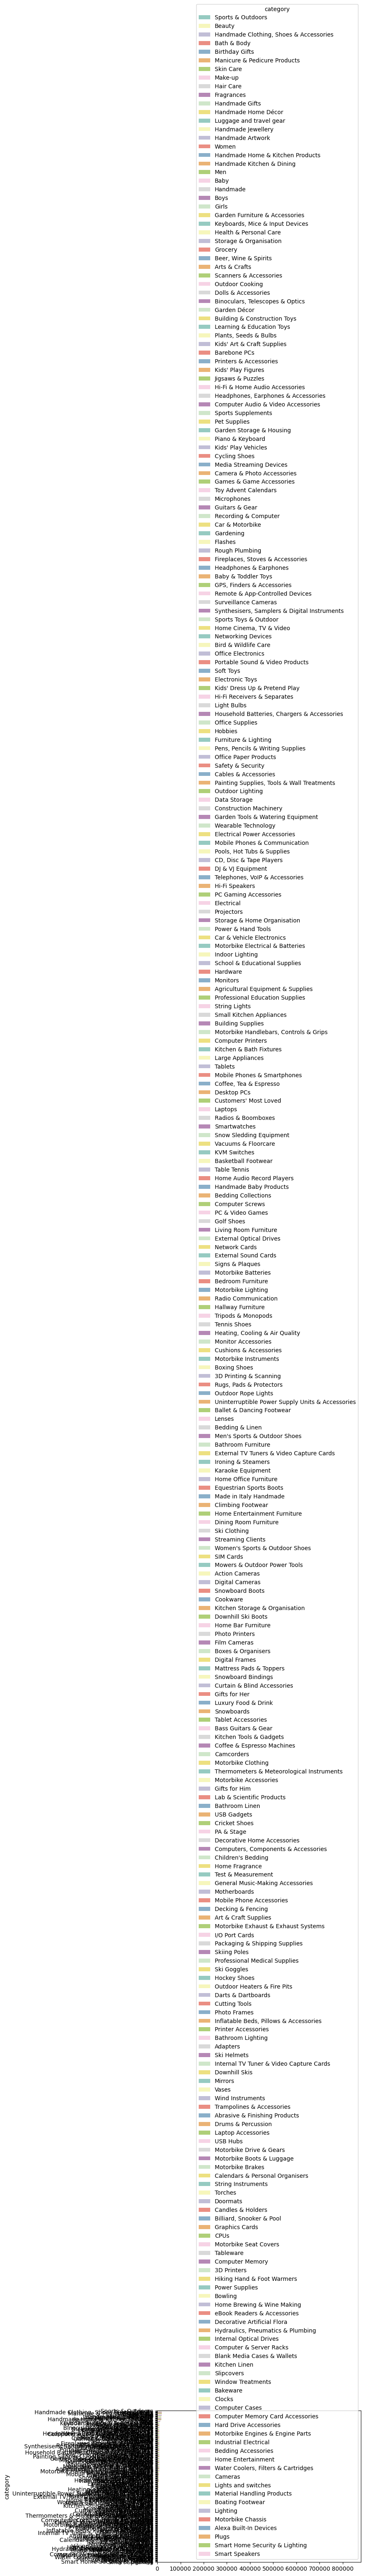

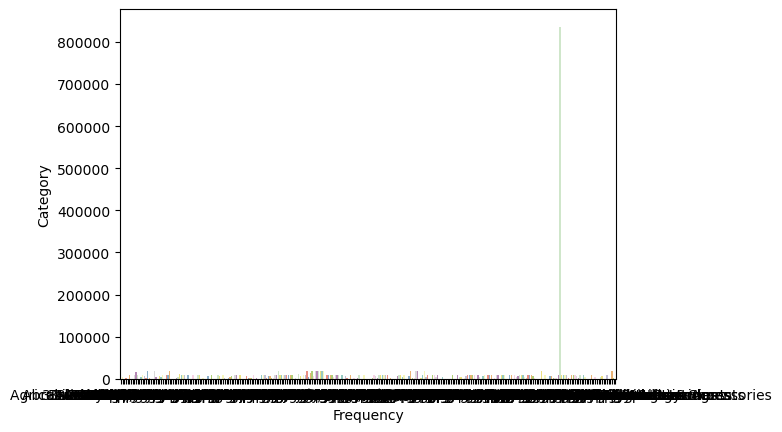

In [10]:
# Plotting a bar chart using the 'count' values from 'my_table', with colors sourced from the "Set3" palette
fig, axes = plt.subplots()
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3",hue=my_table.index, legend=False
            ,ax=axes)
axes.set_ylabel("Category")
axes.set_xlabel("Frequency")
plt.show()

/var/folders/f1/77pps9rs2l9ffb8_p5tj2yrr0000gp/T/ipykernel_43893/3337831721.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_table.index, y=grouped_table['count'], palette="Set3")


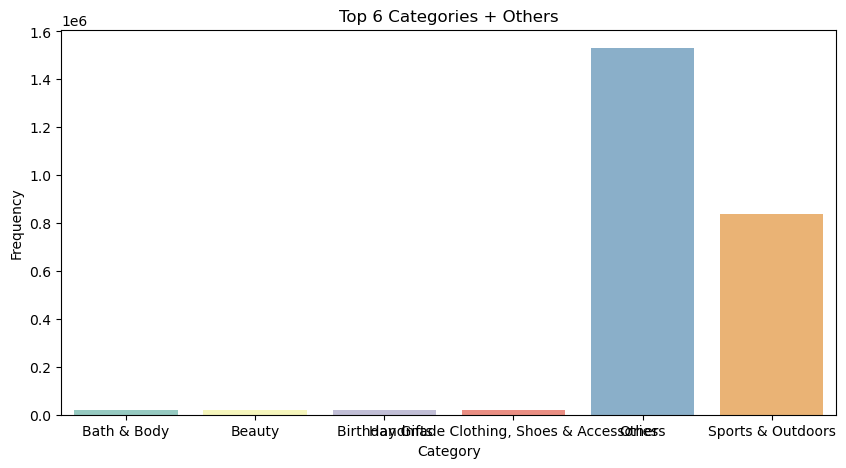

In [11]:
top_categories = my_table["count"].nlargest(5).index
df['category_grouped'] = df['category'].apply(lambda x: x if x in top_categories else 'Others')
grouped_table = pd.crosstab(index=df['category_grouped'], columns='count')
plt.figure(figsize=(10,5))
sns.barplot(x=grouped_table.index, y=grouped_table['count'], palette="Set3")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Top 6 Categories + Others")
plt.show()

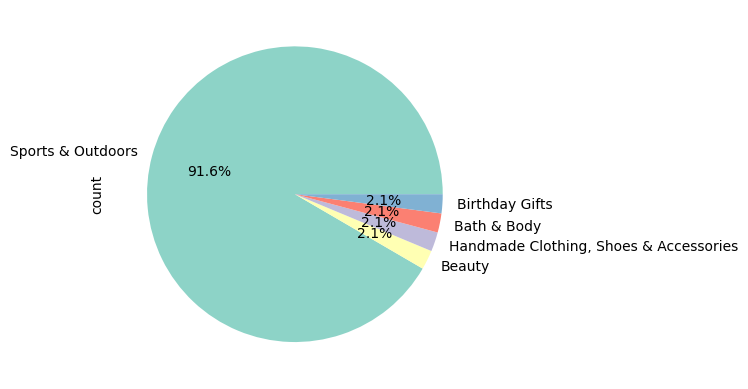

In [12]:
# Plotting a pie chart of the 'categorry' column value counts, with percentage labels,
# starting at angle 90, and using colors from the "Set3" Seaborn palette
top5 = df['category'].value_counts().head(5)
top5.plot.pie(autopct='%.1f%%', startangle=0, colors=sns.color_palette("Set3"));
plt.show()

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [13]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode(0)

mean_price, median_price, mode_price

(np.float64(89.24380943923663),
 19.09,
 0    9.99
 Name: price, dtype: float64)

The avagare price is 89, the median is 19.09. This means there are a few products with very high prices that pull the average up.

Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?

In [14]:
variance_price = df['price'].var()
std_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df ['price'].quantile ()

variance_price, std_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 np.float64(19.09))

The variance, a measure of how far each sale price in the set is from the mean. A high variance implies that sale prices can be quite different from one another.
The range of sale prices is 100000.0, calculated as the difference between the maximum and minimum prices. This wide range underscores the diversity in property prices within the dataset

Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..

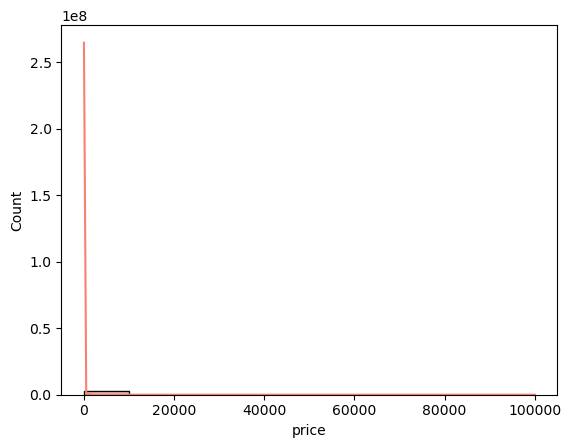

In [15]:
fig,axes = plt.subplots()
sns.histplot(df['price'], kde=True, bins=10, color="salmon", ax=axes);
plt.show()

The praphic looks like this because of the outlines. That meand that some products, only a few of tem, costs extremelu highter than the others. It is better to use a box plot.

In [16]:
# Creating histograms for each numerical column in 'df_numerical'
df['price'].hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.


In [34]:
# Plotting a boxplot for the 'price' column with a light blue color
sns.boxplot(x = df['price'], color="lightblue");

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?

In [22]:
mean_rate = df['stars'].mean()
median_rate = df['stars'].median()
mode_rate = df['stars'].mode()

mean_rate, median_rate, mode_rate

(np.float64(2.152836472966065),
 0.0,
 0    0.0
 Name: stars, dtype: float64)

We can see that the median is 0, that means most of the prducts are not being rated.

Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

In [30]:
var_rate = df['stars'].var()
std_rate = df['stars'].std()
quantile_rate = df['stars'].quantile()

var_rate, std_rate, quantile_rate


(4.81743402976196, 2.1948653785054697, np.float64(0.0))

The variance is also super high., hat shows that the rate is disperse.
The stand variation is quite hight, that means that the rates might have a diferences among them.
The quartile is 0, that means that there is no rates in the quartile.
The reason why this happen might be because most of the products have no rate.

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?

In [32]:
skewness_rate = df['stars'].skew()
kurtosis_rate = df['stars'].kurtosis()

skewness_rate, kurtosis_rate

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

Skewness: The positive value of skewness (1.88) for the 'rate' indicates that the distribution is right-skewed. This means that the tail on the right side (higher rates) is longer than the left side (lower rates). 

Kurtosis: The kurtosis value is smaller than 3, which indicates that the 'rate' distribution has lighter tails and a unclear peak compared to a normal distribution. This means that there are less outliers (extreme values) in the 'rate' than one would expect in a normally distributed set.

Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

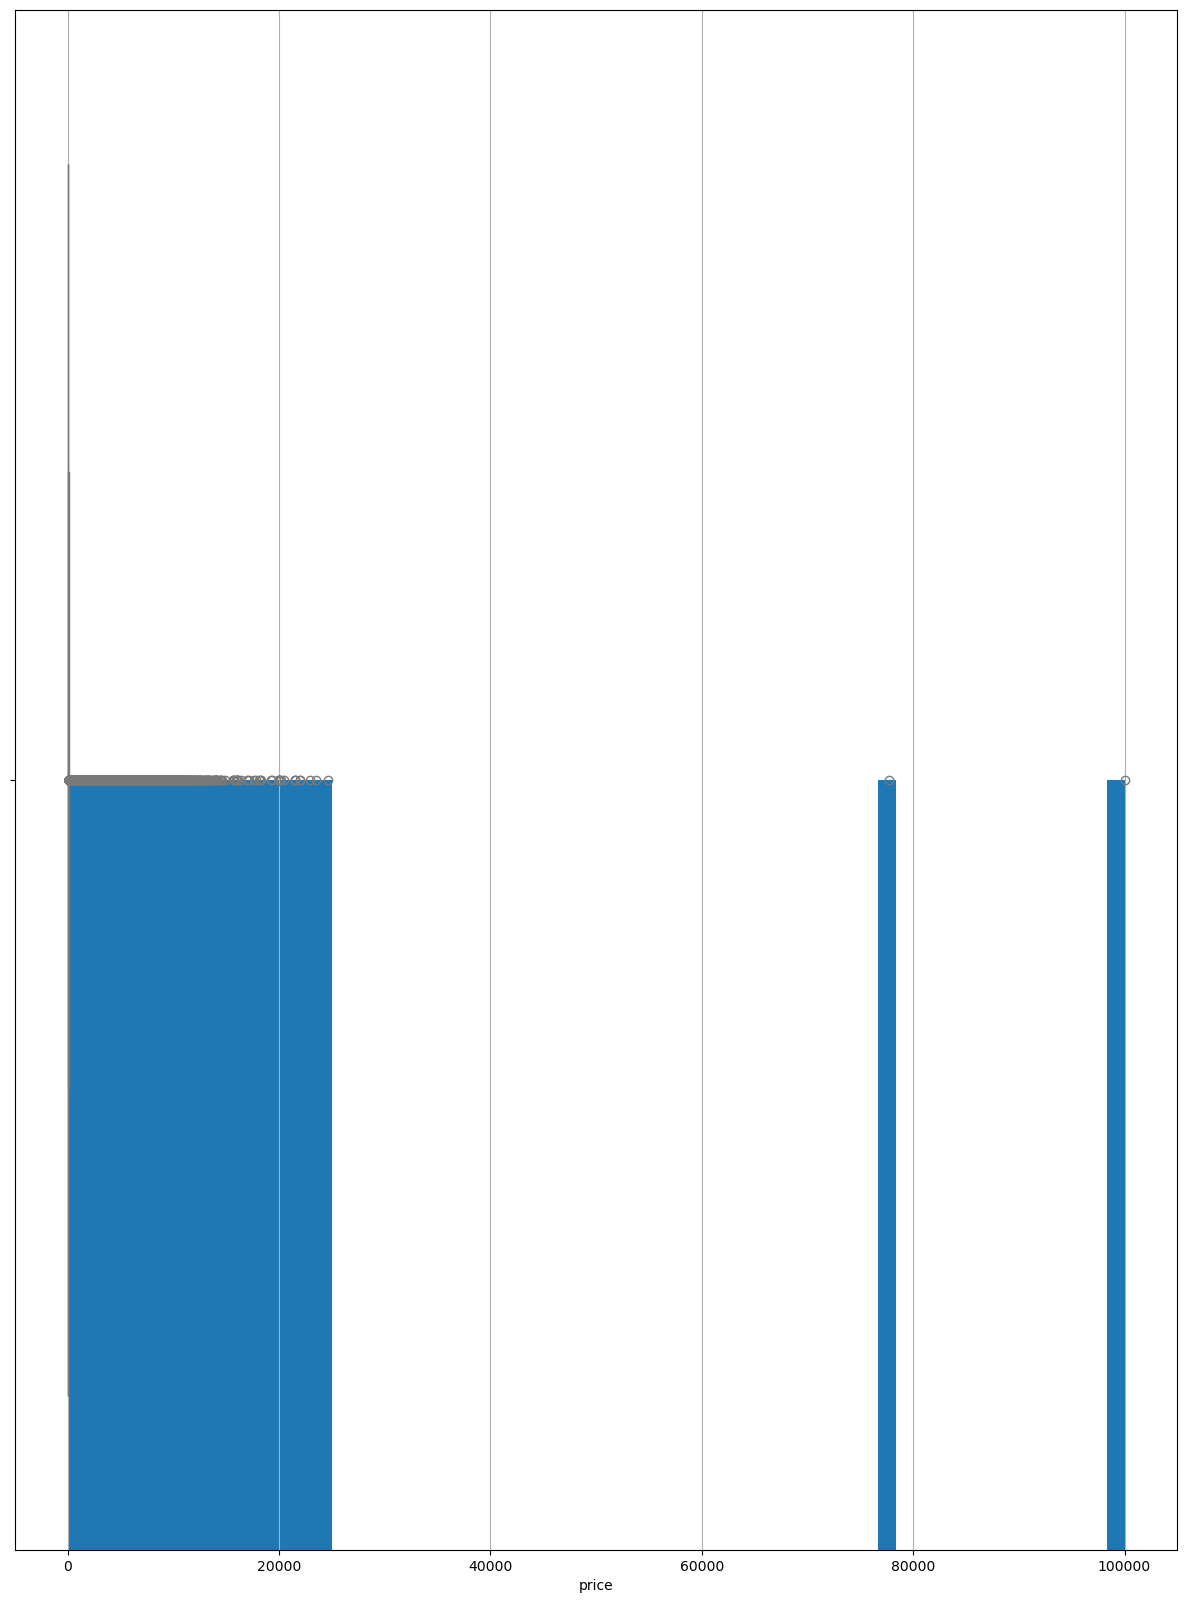

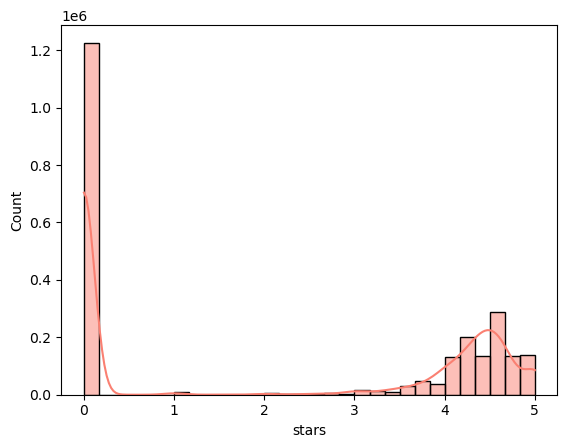

In [33]:
fig, axes = plt.subplots()
sns.histplot(df['stars'], kde=True, bins=30, color="salmon", ax=axes);
plt.show()